In [2]:
%load_ext autoreload

%autoreload 2
from src import ODE_euler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


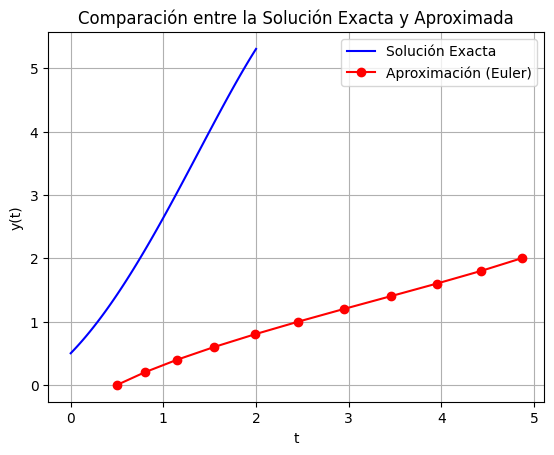

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def f(t: float, y: float) -> float:
    return y - t**2 + 1

def exact_solution(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

# Resolución numérica
EDO_aplox = ODE_euler(a=0, b=2, f=f, y_t0=0.5, N=10)
t_values, y_approx, h = EDO_aplox

# Resolución exacta
EDO_real = ODE_euler(a=0, b=2, f=exact_solution, y_t0=0.5, N=10)
t_values, y_exact, h = EDO_real 


# Gráfica
plt.plot(t_exact, y_exact, label='Solución Exacta', color='blue')
plt.plot(t_values, y_approx, 'o-', label='Aproximación (Euler)', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación entre la Solución Exacta y Aproximada')
plt.legend()
plt.grid()
plt.show()
